# Predicting Home Value
Due to our dataset find, our team has changed our scope from predicting home features to predicting home price using different statistical approaches. Together we will trial and error multiple algorithms and explore there utility in predicting home prices. Across these different algorithms we will use similar metrics such as MSE to determine the relative success of the model.

## Our Scope
A real estate investment firm has tasked our Group1 consulting team to develop a model to predict home prices based on a set of given parameters. Obviously we know location is the biggest idicator of home prices, but our team will use a combination of other home features to figure out the value of a home

## Our Data
We will be using the a publically availble dataset from Kaggle. The data contained in the set Austin, TX House Listings. It was scraped in January 2021 and is highly ranked on Kaggle for being clean and usable. Below is the link to the dataset.
https://www.kaggle.com/datasets/ericpierce/austinhousingprices?resource=download

# Familiarizing with Dataset

In [1]:
# import pandas for EDA
import pandas as pd

In [86]:
file_path = 'austinHousingData.csv'
df = pd.read_csv(file_path)
df.head(3)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [88]:
# identifyng types of houses
df['homeType'].value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [105]:
# identifyng expensive houses
price=df[df['latestPrice']>8000000]
price[['homeType','latestPrice']]

,homeType,latestPrice
290,Single Family,8999000
1298,Single Family,8750000
1399,Vacant Land,12720000
2316,Single Family,13500000
14275,Single Family,13000000
14376,Single Family,8750000
14639,Single Family,8799000


As you can see from the initial info() method, the dataset itself is very clean and usable. There isn't much data pre-processing needed in order to clean the data since there are no null values, and the majority of features are in a usable format.

### Dropping non-int and changing booleans
The only pre-processing we will need to do is to drop any d-type that is not an integer, like columns city, streetAddress, and description. We still have longitute and latitude so location is still within the dataset. Also we want to change the true and false values to 1's and 0's to make the entire dataset numerical.

In [4]:
#Droping the columns that are strings
col_drop_list = ['city', 'streetAddress', 'description', 'homeType','latest_saledate', 'latestPriceSource', 'homeImage' ]
df = df.drop(col_drop_list, axis=1)

df.shape

(15171, 40)

In [5]:
#Changing bool to int
col_bool_list = ['hasAssociation', 'hasCooling', 
                 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

for col in col_bool_list:
    name = col + '_int'
    df[name] = df[col].astype(int)

df.shape

(15171, 46)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   zipcode                     15171 non-null  int64  
 2   latitude                    15171 non-null  float64
 3   longitude                   15171 non-null  float64
 4   propertyTaxRate             15171 non-null  float64
 5   garageSpaces                15171 non-null  int64  
 6   hasAssociation              15171 non-null  bool   
 7   hasCooling                  15171 non-null  bool   
 8   hasGarage                   15171 non-null  bool   
 9   hasHeating                  15171 non-null  bool   
 10  hasSpa                      15171 non-null  bool   
 11  hasView                     15171 non-null  bool   
 12  parkingSpaces               15171 non-null  int64  
 13  yearBuilt                   151

In [7]:
df.hasAssociation_int.value_counts()

1    8007
0    7164
Name: hasAssociation_int, dtype: int64

In [8]:
#Drop the bool columns
df = df.drop(col_bool_list, axis=1)
df.shape

(15171, 40)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   zipcode                     15171 non-null  int64  
 2   latitude                    15171 non-null  float64
 3   longitude                   15171 non-null  float64
 4   propertyTaxRate             15171 non-null  float64
 5   garageSpaces                15171 non-null  int64  
 6   parkingSpaces               15171 non-null  int64  
 7   yearBuilt                   15171 non-null  int64  
 8   latestPrice                 15171 non-null  int64  
 9   numPriceChanges             15171 non-null  int64  
 10  latest_salemonth            15171 non-null  int64  
 11  latest_saleyear             15171 non-null  int64  
 12  numOfPhotos                 15171 non-null  int64  
 13  numOfAccessibilityFeatures  151

Now the data should be cleaned, all numeric, and ready to be used in the analysis.

## Analysis
In this model We will work with physics features of houses and the lastPrice, trying to find a model to predict the price using n number of bathrooms, bedrooms, stories and garage spaces, Size of land and size of living area.

# Selecting phisic features from houses
independent: latestPrice 

dependent: garageSpaces, lotSizeSqFt, livingAreaSqFt, numOfBathrooms, numOfBedrooms, numOfStories

In [10]:
df_houses = df[['latestPrice', 'garageSpaces', 'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories']]
df_houses.head(3)

,latestPrice,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
0,305000,2,6011.0,2601,3.0,4,2
1,295000,2,6185.0,1768,2.0,4,1
2,256125,0,7840.0,1478,2.0,3,1


### Creating testing and training data
In this next step we will be creating the testing and training data for our algorithm. 

In [11]:
# Independent values
X = df[['garageSpaces', 'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories']]

# Dependent values
y = df['latestPrice']

In [12]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Comparing size of X sets
print(X.shape, X_train.shape, X_test.shape)

(15171, 6) (12136, 6) (3035, 6)


### Linear regression with StatsModels

In [14]:
import statsmodels.api as sm

In [15]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [16]:
# Get model results
results = model.fit()

In [17]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     972.4
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:13:16   Log-Likelihood:            -1.7266e+05
No. Observations:               12136   AIC:                         3.453e+05
Df Residuals:                   12129   BIC:                         3.454e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.464e+04   1.51e+04      5.

#### Coeffincient of determination is 0.32 that's not a good number, the better is close to 1
this model is explainin only the 32% of data

### Evaluation

In [18]:
# Get prediction with X_train using the model
y_train_pred = results.predict(sm.add_constant(X_train))
y_train_pred.shape

(12136,)

In [19]:
# RMSE
from sklearn.metrics import mean_squared_error
RMSE_train=mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_train

365204.1086243755

Our model is off by about 365204 dollars in a given prediction

it's a bad number

In [20]:
# Get prediction with X_train using the model
y_test_pred = results.predict(sm.add_constant(X_test))

In [21]:
RMSE_test=mean_squared_error(y_test, y_test_pred, squared=False)
RMSE_test

405801.72456635174

In [22]:
# as long as the difference is small the model is consistent
diff = (RMSE_test - RMSE_train)/ RMSE_test *100
diff

10.004298524201621

## Correlations and checkin data

In [23]:
import numpy as np

In [24]:
df_houses.columns

Index(['latestPrice', 'garageSpaces', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories'],
      dtype='object')

In [25]:
np.corrcoef(df_houses['latestPrice'], df_houses['lotSizeSqFt'])

array([[1.        , 0.02093965],
       [0.02093965, 1.        ]])

In [26]:
np.corrcoef(df_houses['latestPrice'], df_houses['numOfBedrooms'])

array([[1.        , 0.29983879],
       [0.29983879, 1.        ]])

I don't see any reation, so I will plot data

### Plot

The data doenst have order, and there are outliers, so lets check in  a scatter

In [27]:
# Getting serires of number of houses, x
x_houses = len(df_houses[['latestPrice']])
x=range(x_houses)
len(x)

# Setting prices in y
y=df_houses['latestPrice'].values
y.shape

(15171,)

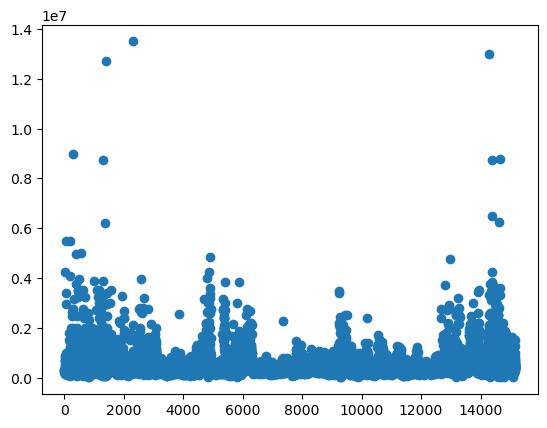

In [28]:
# Plotting data in scatter
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

I can see outliers

the data it's in disorder

In [29]:
# order prices
df_houses= df_houses.sort_values(by='latestPrice', ascending= False)
df_houses.head(10)

,latestPrice,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
2316,13500000,5,710899.2,15394,13.0,6,1
14275,13000000,2,10454.0,4441,4.0,5,2
1399,12720000,0,466963.2,11683,0.0,0,2
290,8999000,3,87120.0,7745,8.0,7,2
14639,8799000,0,26136.0,6596,6.0,5,2
1298,8750000,0,204296.4,9210,7.0,6,2
14376,8750000,2,79714.8,6046,7.0,5,2
14395,6499000,0,48787.2,7904,8.0,5,2
14627,6250000,4,37026.0,5775,7.0,5,1
1360,6200000,0,257004.0,11622,8.0,5,2


In [30]:
print('mean', np.mean(df_houses['latestPrice']))
print('median', np.median(df_houses['latestPrice']))
print('std desv', np.std(df_houses['latestPrice']))

mean 512767.7437215741
median 405000.0
std desv 453170.37797141203


I will delete outliers above 7000000

In [82]:
# prices below 1 000 000
df_houses = df_houses[df_houses['latestPrice']<2000000]
df_houses = df_houses.sort_values(by='latestPrice')

In [83]:
# order prices
df_houses= df_houses.sort_values(by='latestPrice', ascending= False)
df_houses.head(3)

,latestPrice,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories
8896,99950,0,5009.0,1118,2.0,3,1
4379,99900,2,3615.0,2021,3.0,4,2
11425,99900,1,10759.0,2251,4.0,4,1


In [84]:
print('mean', np.mean(df_houses['latestPrice']))
print('median', np.median(df_houses['latestPrice']))
print('std desv', np.std(df_houses['latestPrice']))

mean 66845.7
median 78250.0
std desv 32315.06638824477


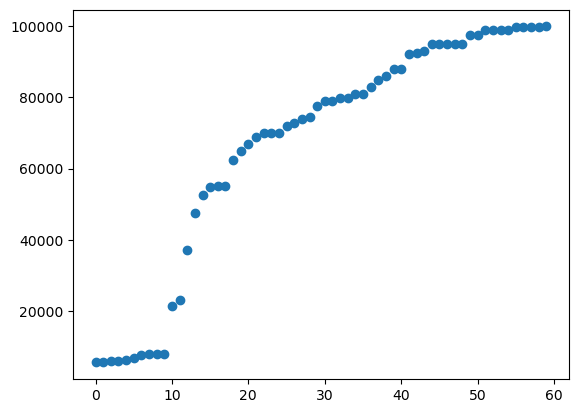

In [81]:
# plotting in scatter

# Getting serires of number of houses
x_houses = len(df_houses[['latestPrice']])
x=range(x_houses)
len(x)

# Setting prices in y
y=df_houses['latestPrice'].values
y.shape

# Plotting data in scatter
plt.scatter(x, y)
plt.show()

In [34]:
# Independent values
X = df_houses[['garageSpaces', 'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories']]

# Dependent values
y = df_houses['latestPrice']

In [35]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [37]:
# Get model results
results = model.fit()

In [38]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     493.6
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:13:18   Log-Likelihood:            -1.5248e+05
No. Observations:               11374   AIC:                         3.050e+05
Df Residuals:                   11367   BIC:                         3.050e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.033e+05   6923.091     29.

Adding more features:

In [39]:
# prices below 1 000 000
df = df[df['latestPrice']<1000000]
df = df.sort_values(by='latestPrice')

In [40]:
# Independent values
X = df[['numOfBathrooms', 'livingAreaSqFt', 'numOfBedrooms', 'avgSchoolRating', 'numOfStories','MedianStudentsPerTeacher',
        'hasSpa_int','garageSpaces','parkingSpaces','numOfElementarySchools','numOfPhotos','hasView_int','numOfMiddleSchools']]

# Dependent values
y = df['latestPrice']

In [41]:
# importing train_test_split to create testing and trainin data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [43]:
# Get model results
results = model.fit()

In [44]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     412.2
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:13:18   Log-Likelihood:            -1.5160e+05
No. Observations:               11374   AIC:                         3.032e+05
Df Residuals:                   11360   BIC:                         3.033e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

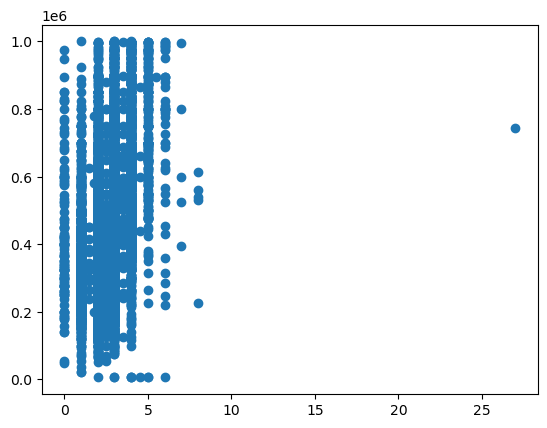

In [45]:
import matplotlib.pyplot as plt
plt.scatter(df['numOfBathrooms'],df['latestPrice'])
plt.show()